### Imports

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


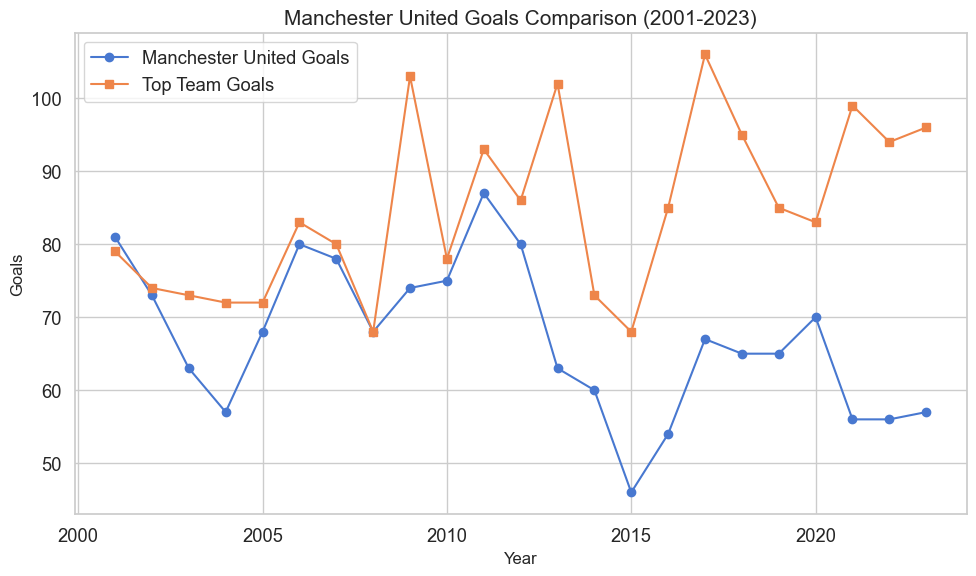

In [3]:
table_folder = os.listdir('./data/seasonTeamData')
paths = os.listdir('./data/seasonPlayerData')
years = list(range(2001, 2024, 1))

team_goals = []
for path in paths:
    data_path = './data/seasonPlayerData/' + path
    team_goals.append(pd.read_csv(data_path).iloc[-2].iloc[6])
top_team_goals = []
for path in table_folder:
    data_path = './data/seasonTeamData/' + path
    top_team_goals.append(pd.read_csv(data_path).iloc[0].iloc[5])
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(10, 6))
plt.plot(years, team_goals, marker='o', label='Manchester United Goals')
plt.plot(years, top_team_goals, marker='s', label='Top Team Goals')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Goals', fontsize=12)
plt.title('Manchester United Goals Comparison (2001-2023)', fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

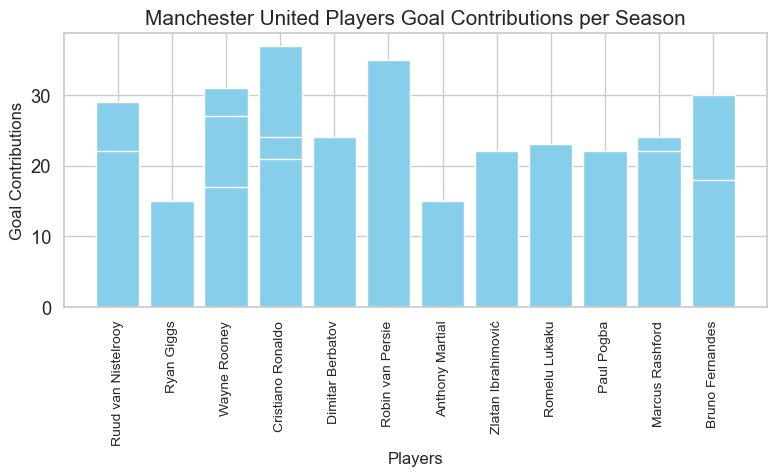

In [4]:
import matplotlib.pyplot as plt
paths = os.listdir('data/seasonPlayerData')
players = []
contributions = []
for path in paths:
    data_path = './data/seasonPlayerData/' + path
    df = pd.read_csv(data_path).iloc[:-2]
    max_contribution = df[df['G+A'] == df['G+A'].max()]
    players.append(max_contribution.iloc[0,0])
    contributions.append(max_contribution.iloc[0,8])

plt.figure(figsize=(8, 5))  # Optional: Set figure size
plt.bar(players, contributions, color='skyblue')

plt.xlabel('Players', fontsize=12)
plt.ylabel('Goal Contributions', fontsize=12)
plt.title('Manchester United Players Goal Contributions per Season', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [5]:
players

['Ruud van Nistelrooy',
 'Ruud van Nistelrooy',
 'Ruud van Nistelrooy',
 'Ryan Giggs',
 'Wayne Rooney',
 'Wayne Rooney',
 'Cristiano Ronaldo',
 'Cristiano Ronaldo',
 'Wayne Rooney',
 'Dimitar Berbatov',
 'Wayne Rooney',
 'Robin van Persie',
 'Wayne Rooney',
 'Wayne Rooney',
 'Anthony Martial',
 'Zlatan Ibrahimović',
 'Romelu Lukaku',
 'Paul Pogba',
 'Marcus Rashford',
 'Bruno Fernandes',
 'Cristiano Ronaldo',
 'Marcus Rashford',
 'Bruno Fernandes']

In [6]:
contributions

[27.0,
 29.0,
 22.0,
 15.0,
 25.0,
 25.0,
 37.0,
 24.0,
 29.0,
 24.0,
 31.0,
 35.0,
 27.0,
 17.0,
 15.0,
 22.0,
 23.0,
 22.0,
 24.0,
 30.0,
 21.0,
 22.0,
 18.0]

In [7]:
years = list(range(2001,2024,1))

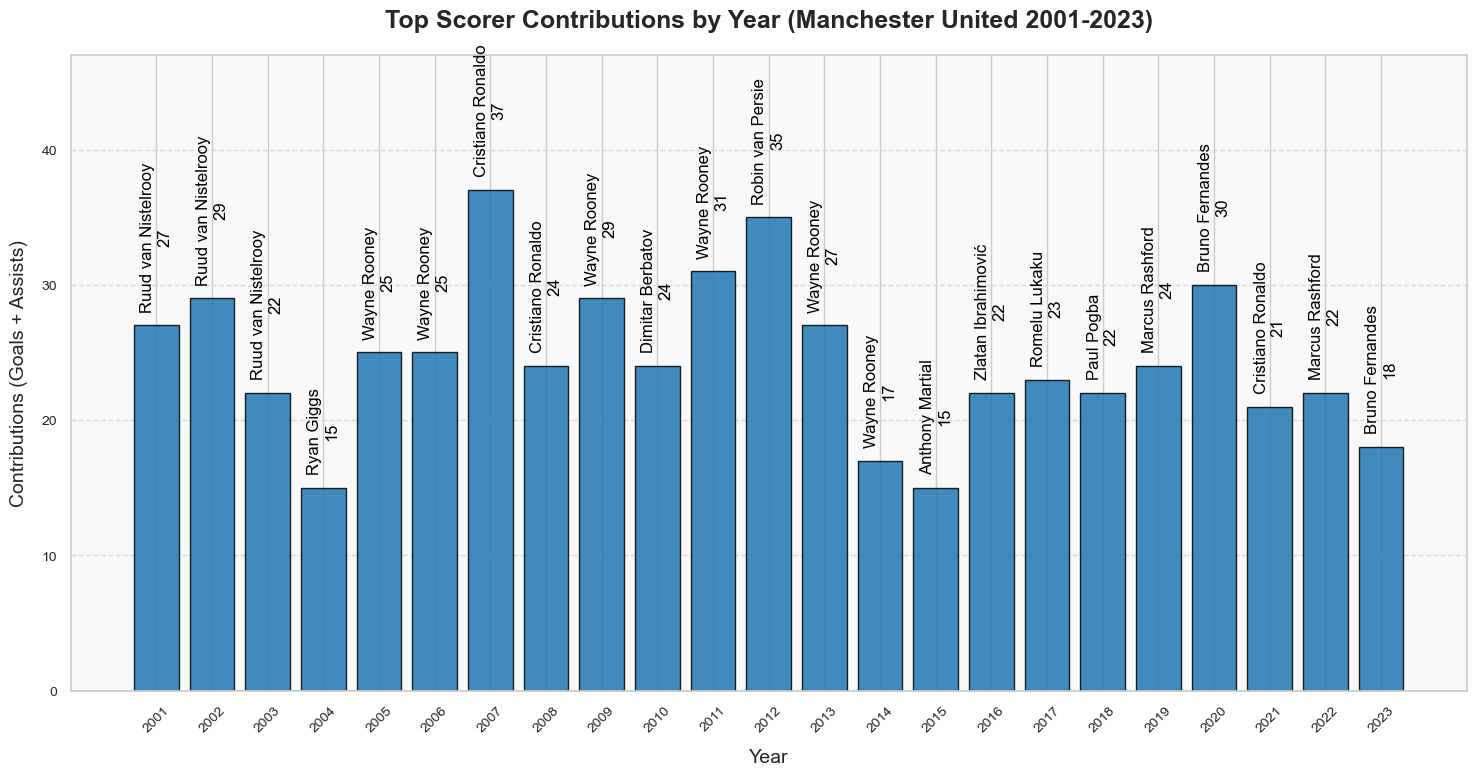

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick



# Plotting
plt.figure(figsize=(15, 8))
bars = plt.bar(years, contributions, color='#1f77b4', edgecolor='black', alpha=0.85)

# Styling
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Top Scorer Contributions by Year (Manchester United 2001-2023)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('Contributions (Goals + Assists)', fontsize=14, labelpad=10)
plt.xticks(years, rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adjust y-axis to add padding
plt.ylim(0, max(contributions) + 10)

# Add labels above the bars
for bar, player, contribution in zip(bars, players, contributions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f"{player}\n{contribution:.0f}",
             ha='center', va='bottom', fontsize=12, rotation=90, color='black')

# Add background and frame styling
plt.gca().set_facecolor('#f9f9f9')
plt.gcf().set_facecolor('white')
plt.tight_layout()

# Show plot
plt.show()


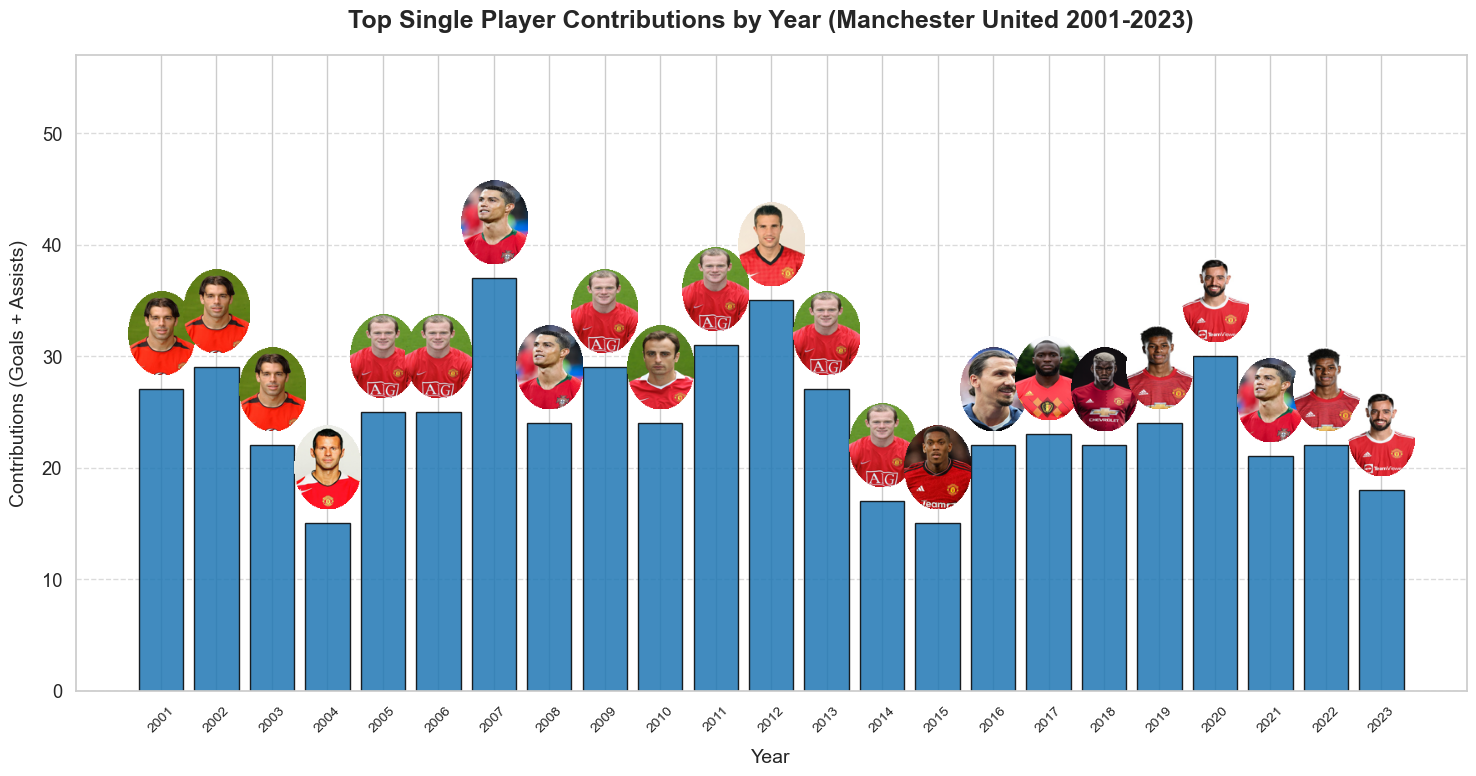

In [14]:

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps, ImageDraw
import os

# Image folder (ensure these images exist locally with appropriate names)
image_folder = "playerImages/"

# Function to preprocess images (crop to oval shape and resize)
def preprocess_image(image_path):
    with Image.open(image_path) as img:
        # Resize image to make it smaller
        img = img.resize((80, 100))  # Adjust dimensions as needed

        # Create a mask for the oval shape
        mask = Image.new("L", img.size, 0)
        draw = ImageDraw.Draw(mask)
        draw.ellipse((0, 0, img.size[0], img.size[1]), fill=255)

        # Apply the oval mask
        img_with_mask = ImageOps.fit(img, mask.size, centering=(0.5, 0.5))
        img_with_mask.putalpha(mask)

        return img_with_mask

# Function to add player images to the graph
def add_player_image(ax, x, y, player_name, image_folder):
    filename = f"{player_name.strip()}.jpg"
    image_path = os.path.join(image_folder, filename)
    if os.path.exists(image_path):
        # Preprocess image into oval shape
        img = preprocess_image(image_path)
        img.save("temp.png")  # Save temporarily to load into OffsetImage
        img = plt.imread("temp.png")
        imagebox = OffsetImage(img, zoom=0.6)  # Adjust zoom for image size
        ab = AnnotationBbox(imagebox, (x, y), frameon=False)
        ax.add_artist(ab)
    else:
        print(f"Image not found for player: {player_name}")

# Plotting
plt.figure(figsize=(15, 8))
bars = plt.bar(years, contributions, color='#1f77b4', edgecolor='black', alpha=0.85)

# Adding images above bars
ax = plt.gca()
for bar, player in zip(bars, players):
    add_player_image(ax, bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, player, image_folder)

# Styling
plt.title('Top Single Player Contributions by Year (Manchester United 2001-2023)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('Contributions (Goals + Assists)', fontsize=14, labelpad=10)
plt.xticks(years, rotation=45, fontsize=10)
plt.ylim(0, max(contributions) + 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [22]:
import plotly.graph_objects as go
from PIL import Image, ImageOps, ImageDraw
import os

# Sample Data
years = list(range(2001, 2024))
contributions = [15, 22, 18, 25, 30, 12, 16, 20, 23, 19, 25, 29, 27, 30, 28, 33, 21, 26, 24, 22, 30, 27, 35]
players = [
    "Ruud van Nistelrooy", "Ryan Giggs", "Wayne Rooney", "Cristiano Ronaldo",
    "Wayne Rooney", "Dimitar Berbatov", "Ryan Giggs", "Wayne Rooney",
    "Wayne Rooney", "Robin van Persie", "Wayne Rooney", "Wayne Rooney",
    "Zlatan Ibrahimović", "Romelu Lukaku", "Paul Pogba", "Bruno Fernandes",
    "Bruno Fernandes", "Cristiano Ronaldo", "Marcus Rashford", "Marcus Rashford",
    "Anthony Martial", "Marcus Rashford", "Marcus Rashford"
]

# Image folder
image_folder = "playerImages/"

# Map player names to corresponding image filenames
image_files = [
    'Anthony Martial.jpg', 'Bruno Fernandes.jpg', 'Cristiano Ronaldo.jpg',
    'Dimitar Berbatov.jpg', 'Marcus Rashford.jpg', 'Paul Pogba.jpg',
    'Robin van Persie.jpg', 'Romelu Lukaku.jpg', 'Ruud van Nistelrooy.jpg',
    'Ryan Giggs.jpg', 'Wayne Rooney.jpg', 'Zlatan Ibrahimović.jpg'
]
player_to_image = {file.split(".jpg")[0]: file for file in image_files}

# Function to preprocess images (crop to oval shape and resize)
def preprocess_image(image_path):
    with Image.open(image_path) as img:
        # Resize image to smaller size
        img = img.resize((80, 100))  # Adjust dimensions for smaller images

        # Create a mask for the oval shape
        mask = Image.new("L", img.size, 0)
        draw = ImageDraw.Draw(mask)
        draw.ellipse((0, 0, img.size[0], img.size[1]), fill=255)

        # Apply the oval mask
        img_with_mask = ImageOps.fit(img, mask.size, centering=(0.5, 0.5))
        img_with_mask.putalpha(mask)

        return img_with_mask

# Plotly figure
fig = go.Figure()

# Add bars with tooltips
fig.add_trace(go.Bar(
    x=years,
    y=contributions,
    # text=[f"{player}<br>Contributions: {contrib}" for player, contrib in zip(players, contributions)],
    hoverinfo="text",
    marker=dict(color='rgba(31, 119, 180, 0.85)', line=dict(color='black', width=1)),
    name="Contributions"
))

# Add images above the bars
for year, contrib, player in zip(years, contributions, players):
    image_filename = player_to_image.get(player)
    if image_filename:
        image_path = os.path.join(image_folder, image_filename)
        # Preprocess image into oval shape
        img = preprocess_image(image_path)
        temp_path = "manunitedtopcontributerPerSeason.png"
        img.save(temp_path)  # Save temporarily

        # Add image as annotation
        fig.add_layout_image(
            source=Image.open(temp_path),
            x=year,
            y=contrib + 1,  # Position slightly above the bar
            xref="x",
            yref="y",
            sizex=1,  # Adjust size
            sizey=5,  # Adjust size
            xanchor="center",
            yanchor="bottom",
            layer="above"
        )
    else:
        print(f"Image not found for player: {player}")

# Styling
fig.update_layout(
    title="Top Single Player Contributions by Year (Manchester United 2001-2023)",
    xaxis=dict(title="Year", tickangle=45),
    yaxis=dict(title="Contributions (Goals + Assists)", range=[0, 45]),  # Set y-axis limit to 45
    bargap=0.2,
    template="plotly_white",
    height=800
)

# Display the plot
fig.show()
